(sec:vancartopy)=
# Mapping Vancouver with cartopy 

- Download cartopy_mapping_vancouver.ipynb from the [week2 folder](https://drive.google.com/drive/folders/1-Ja2wVKVIjkZb7Gx_rfc14J_aBYiknuw?usp=sharing)

The pamphlet: 

- [Understanding map projections](https://drive.google.com/file/d/1araPnZwMui9tBTPyLO_UHVC2DDEIdZ0p/view?usp=sharing)

   Introduces geographic coordinate systems in Chapter 1.  They solve the problem of how to locate yourself on the earth's surface in three dimensions.  They specify an angular measure of units, a prime meridian, a spheroid and a datam (see chapter 1).

## Basic points

We need to define two fundamental things:

1.  A "[datum](https://www.maptools.com/tutorials/map_datum)"  (called a "globe" in cartopy) that gives the three dimensional shape of the earth (and other things)

1.  A "[projection](https://en.wikipedia.org/wiki/List_of_map_projections)" that maps a point on the earth's surface onto an x-y coordinate system to make a 2-dimensional plot.

1.  Our mapping module is called [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html).  Internally, it uses projection code in [pyproj](https://github.com/jswhit/pyproj), which in turn is a wrapper around C code called
[proj4](https://proj4.org/usage/projections.html)

## An example

The [Equal Area Scalable Earth Grid](https://nsidc.org/data/ease)

1. Datum: The original EASE grid assumed a spherical earth with a radius of 6371.228 km.  [EASE-2](https://nsidc.org/data/ease/versions.html) uses a datum called [WGS 84](https://en.wikipedia.org/wiki/World_Geodetic_System)

1. Both EASE and EASE-2 use the [Lambert Azimuthal Equal Area](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection) or LAEA

## Map projections

Chapter 2 describes map projections.  We will generally be using the LAEA projection for individual Modis granules.

### plotting Vancouver on a map


* Step 1: Use [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) to make a LAEA map of BC including Vancouver.

**This cell sets up the datum and the LAEA projection, with the tangent point at the North Pole and the central meridian at -90 degrees west of Greenwich**

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
#
# Datum: radius of the earth in meters
#
radius = 6_371_228

#
# vancouver longitude, latitude indegrees
#
van_lon, van_lat = [-123.1207, 49.2827]
#
# use a simple sphere as the datum
#
globe = ccrs.Globe(ellipse=None, semimajor_axis=radius, semiminor_axis=radius)
#
# set up
#
projection = ccrs.LambertAzimuthalEqualArea(
    central_latitude=90, central_longitude=-90, globe=globe
)
print(f"pro4 program params: {projection.proj4_params}")
type(projection)

pro4 program params: {'a': 6371228, 'b': 6371228, 'proj': 'laea', 'lon_0': -90, 'lat_0': 90, 'x_0': 0.0, 'y_0': 0.0}


cartopy.crs.LambertAzimuthalEqualArea

**Use matplotlib to draw the map and add a coastline**

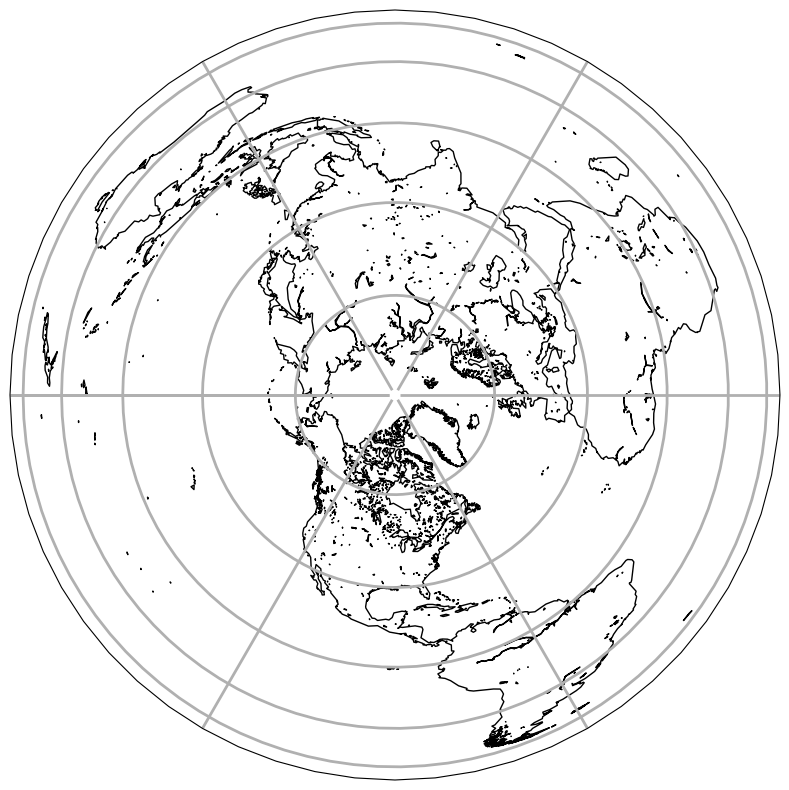

In [2]:
# silence geojson warnings
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={"projection": projection})
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale="coarse", levels=[1, 2, 3]));

*  zoom in on vancouver

The next step is to pick an bounding box in map coordinates (the "extent") to limit the map area

The idea is to reduce the extent of the map to a region that is only a fraction
of the original full globe.  The strategy is to find a point in your swath and
get it's x,y coords, then use that to set the corners of the map so that
you have your region of interest

In [3]:
#
# pick a bounding box in map coordinates
# (we know from the next cell that vancouver is located
# at x,y = -2_422_235, -3_721_768  so pick a bounding box
# based on that define abox that is 3200 km wide and 1600 km tall
#
xleft, xright = -4_000_000, -800_000
ybot, ytop = -4_700_000, -3_100_000

* Use the transform_point method to get x,y on this projection

This is how we put Vancouver (in lon,lat coords) on the map (in LAEA x,y coords)

We use the `projection.transform_point` method to get the lat/lon of Vancouver into map coordinates

Vancouver map x, y: -2422235, -3712769 meters


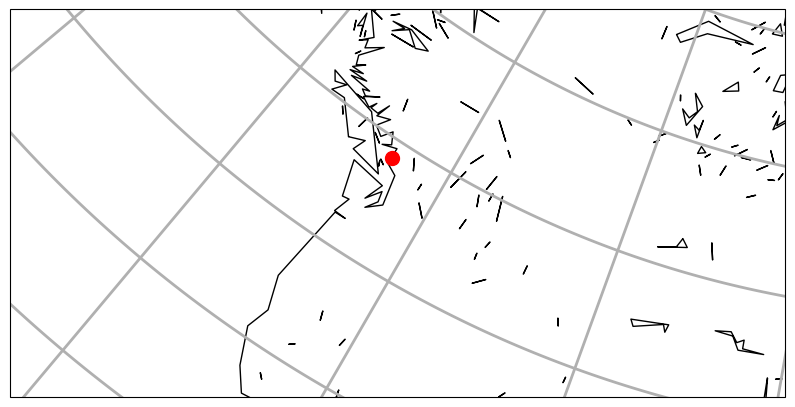

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={"projection": projection})
#
# clip with 0,0 in the center:  [xleft, xright, ybot, ytop]
#
new_extent = [xleft, xright, ybot, ytop]
ax.set_extent(new_extent, projection)
#
# the simple lon,lat projection is called "geodetic"
# transform this from geodetic into the projection ccrs.LambertAzimuthalEqualArea
# defined above
#
geodetic = ccrs.Geodetic()
van_x, van_y = projection.transform_point(van_lon, van_lat, geodetic)
ax.plot(van_x, van_y, "ro", markersize=10)
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale="coarse", levels=[1, 2, 3]))
print(f"Vancouver map x, y: {van_x:.0f}, {van_y:.0f} meters");

## Now plot a location of your choice

As discussed in class, pick a point on the earth you're interested in, at least 1000 km away from Vancouver with
a coastline of more than 100 km.   Make a LAEA map with your point located with a red dot.  You will probably need to
define a new LAEA map projection with a better central lat/lon than the North Pole.